In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random
random.seed(42)

%matplotlib inline

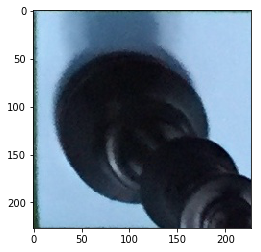

In [2]:
image = cv2.imread('H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\train\\bk\\0646_63.jpg') 
plt.imshow(image)

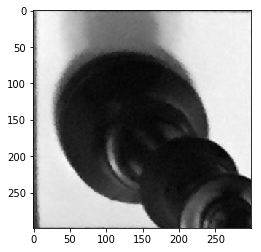

In [3]:
height, width = image.shape[:2]
resized_image = cv2.resize(image, (299, 299), interpolation = cv2.INTER_AREA)
# plt.imshow(resized_image)
gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [4]:
def get_image_intensity_histogram(file_location):
    image = cv2.imread(file_location)
    resized_image = cv2.resize(image, (200, 200), interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    return np.squeeze(hist)
    

In [5]:
def get_features_labels(data_path):
    X, y = [], []
    features_with_labels = []
    for fol in os.listdir(data_path):
        if ((fol[0] == "b") or (fol[0] == "w")):
            fol_path = os.path.join(data_path, fol)
            for file in os.listdir(fol_path):
                if ".jpg" in file:

                    if fol[0] == "b":
                        label = 0
                    else:
                        label = 1

                    complete_file_loc = os.path.join(fol_path, file)
                    #print(complete_file_loc)
                    features_with_labels.append({"feature": get_image_intensity_histogram(complete_file_loc), "label": label})
                    
    random.shuffle(features_with_labels)
    #print(X[0][0])
    #print(X[0][1])
    X = [x["feature"] for x in features_with_labels]
    y = [x["label"] for x in features_with_labels]

    return np.array(X), np.array(y)

In [6]:
X_train, y_train = get_features_labels("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\train")
X_test, y_test = get_features_labels("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\test")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6899, 256)
(6899,)
(185, 256)
(185,)


(array([3424.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3475.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

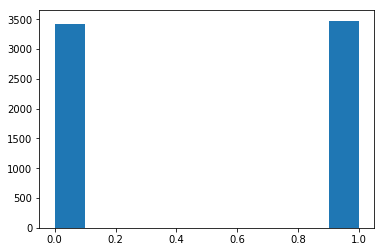

In [7]:
plt.hist(y_train)

(array([90.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 95.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

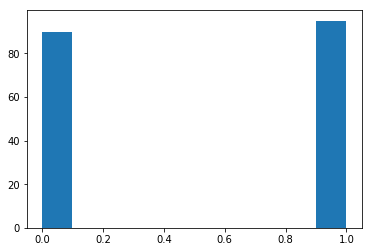

In [8]:
plt.hist(y_test)

In [9]:
y_train[:100]

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0])

In [10]:
y_test[:100]

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [11]:
num_training_records = X_train.shape[0]

In [12]:
y_train[:20]

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [13]:
X_train[0]

array([   0.,    0.,    0.,    0.,    0.,    0.,    6.,   31.,  141.,
        328.,  493.,  604.,  590.,  578.,  632.,  657.,  655.,  528.,
        546.,  475.,  507.,  459.,  407.,  407.,  321.,  303.,  327.,
        277.,  256.,  200.,  157.,  109.,  102.,  114.,  106.,   93.,
         76.,   71.,   63.,   68.,  100.,   87.,   75.,   60.,   78.,
         72.,   74.,   95.,   82.,  103.,   78.,   78.,   80.,   77.,
         65.,   70.,  107.,   79.,   94.,  106.,   85.,  103.,  108.,
        106.,  113.,  117.,  100.,  113.,  105.,  125.,  110.,   95.,
        103.,  100.,  111.,  113.,   97.,   98.,  104.,  126.,  140.,
        178.,  158.,  126.,  105.,   86.,   90.,   82.,   75.,   77.,
         69.,   54.,   53.,   51.,   58.,   53.,   54.,   52.,   44.,
         64.,   43.,   40.,   38.,   46.,   48.,   40.,   51.,   41.,
         50.,   44.,   44.,   30.,   59.,   45.,   30.,   41.,   36.,
         37.,   49.,   40.,   34.,   48.,   32.,   44.,   37.,   41.,
         34.,   50.,

In [14]:
X_train

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ..., 785., 101.,   0.],
       ...,
       [  0.,   0.,   1., ..., 171.,  27.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ..., 392., 292.,   8.]], dtype=float32)

## XGBoost does not require feature scaling [Refer](https://stats.stackexchange.com/questions/353462/what-are-the-implications-of-scaling-the-features-to-xgboost)

In [15]:
X_concat = np.append(X_train, X_test, axis=0)
print(X_concat.shape)


#min_max_scaler = MinMaxScaler()
#X_concat_scaled = min_max_scaler.fit_transform(X_concat)
#X_concat_scaled = preprocessing.scale(X_concat)
#X_concat_scaled = X_concat

#print(X_concat_scaled.shape)

#X_train = X_concat_scaled[:num_training_records, :]
#X_test = X_concat_scaled[num_training_records:, :]

#print(X_train.shape)
#print(X_test.shape)

(7084, 256)


In [16]:
import xgboost as xgb

gbm = xgb.XGBClassifier(max_depth=5, n_estimators=1000, learning_rate=0.05, objective= 'binary:logistic').fit(X_train, y_train)
y_test_prections = gbm.predict(X_test)
y_train_predictions = gbm.predict(X_train)
print(y_test_prections.shape)


(185,)


G:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
G:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [17]:
y_test_prections

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0])

In [18]:
import itertools
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[81  9]
 [ 1 94]]


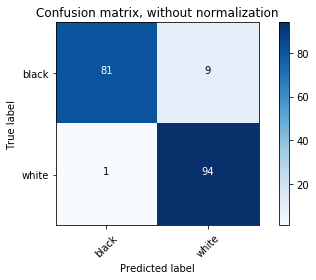

In [19]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_prections)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["black", "white"],
                      title='Confusion matrix, without normalization')

In [20]:
print(precision_recall_fscore_support(y_test, y_test_prections))
print(accuracy_score(y_test, y_test_prections))

(array([0.99, 0.91]), array([0.9 , 0.99]), array([0.94, 0.95]), array([90, 95], dtype=int64))
0.9459459459459459


In [21]:
def generate_performance_results(actual, predicted):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(actual, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["black", "white"], title='Confusion matrix, without normalization')
    
    print("Precision, recall, F score and support (per class): ")
    print(precision_recall_fscore_support(actual, predicted))
    print("Accuracy")
    print(accuracy_score(actual, predicted))

In [22]:
X_train

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ..., 785., 101.,   0.],
       ...,
       [  0.,   0.,   1., ..., 171.,  27.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ..., 392., 292.,   8.]], dtype=float32)

Confusion matrix, without normalization
[[74 16]
 [ 1 94]]
Precision, recall, F score and support (per class): 
(array([0.99, 0.85]), array([0.82, 0.99]), array([0.9 , 0.92]), array([90, 95], dtype=int64))
Accuracy
0.9081081081081082


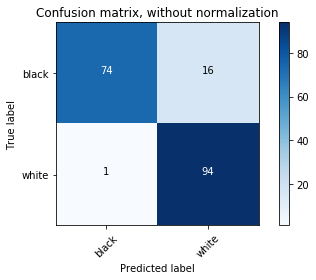

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
generate_performance_results(y_test, y_predicted)

In [34]:
clf.feature_importances_

array([0.00e+00, 0.00e+00, 1.18e-06, 1.06e-05, 1.87e-05, 2.20e-05,
       2.09e-04, 3.44e-04, 9.39e-04, 7.29e-04, 7.58e-04, 1.29e-03,
       4.44e-03, 3.65e-03, 9.85e-03, 7.83e-03, 6.62e-03, 7.02e-03,
       1.22e-02, 1.10e-02, 1.60e-02, 1.32e-02, 1.78e-02, 2.40e-02,
       2.76e-02, 4.01e-02, 4.58e-02, 5.84e-02, 4.53e-02, 2.71e-02,
       2.50e-02, 1.22e-02, 9.28e-03, 1.11e-02, 4.41e-03, 5.81e-03,
       4.39e-03, 1.73e-03, 2.45e-03, 3.38e-03, 1.56e-03, 2.04e-03,
       1.77e-03, 8.96e-04, 1.60e-03, 6.95e-04, 1.99e-03, 4.78e-04,
       5.54e-04, 1.28e-03, 5.32e-04, 4.31e-04, 8.24e-04, 1.57e-04,
       1.77e-04, 1.17e-04, 1.50e-04, 1.40e-04, 1.78e-04, 2.50e-04,
       1.71e-04, 1.79e-04, 1.32e-04, 1.13e-04, 1.48e-04, 1.00e-04,
       1.07e-04, 1.04e-04, 7.51e-05, 6.60e-05, 1.16e-04, 6.36e-05,
       3.11e-05, 5.61e-05, 7.97e-06, 1.99e-05, 1.92e-05, 8.25e-06,
       3.91e-06, 1.32e-05, 7.03e-06, 1.05e-05, 1.75e-05, 1.20e-05,
       2.32e-05, 6.84e-06, 1.77e-05, 6.10e-06, 1.14e-05, 1.23e

In [25]:
import pandas as pd
X_train_df = pd.DataFrame(data=X_train, index=list(range(X_train.shape[0])), columns=[str(x) for x in range(256)])
X_train_df.tail()[["56", "128", "183"]]

,56,128,183
6894,4378.0,4.0,0.0
6895,0.0,133.0,70.0
6896,145.0,14.0,119.0
6897,1067.0,4.0,5.0
6898,1.0,15.0,46.0


In [26]:
X_train[:, 128]

array([ 43., 208.,   0., ...,  14.,   4.,  15.], dtype=float32)

In [27]:
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
count,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,...,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000
mean,0.000145,0.002174,0.016669,0.095811,0.332802,1.003189,2.595014,5.949993,12.125236,21.747499,...,46.739674,48.364979,50.574867,54.645020,58.456879,62.040730,73.150024,72.174080,47.001160,0.758516
std,0.012039,0.049596,0.177393,0.893267,2.807067,6.558646,14.146492,26.229166,44.745632,68.877319,...,87.577728,93.605705,100.067497,111.786674,122.715157,133.468536,164.217072,192.919342,177.425385,14.129780
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,6.000000,...,69.000000,68.000000,67.000000,71.000000,73.000000,73.000000,76.000000,41.000000,2.000000,0.000000
max,1.000000,2.000000,7.000000,44.000000,150.000000,296.000000,513.000000,771.000000,1086.000000,1307.000000,...,859.000000,861.000000,1098.000000,1075.000000,1040.000000,1198.000000,1552.000000,1891.000000,2294.000000,779.000000


In [28]:
X_train_df[["157"]].describe()

,157
count,6899.000000
mean,59.939846
std,117.629082
min,0.000000
25%,9.500000
50%,31.000000
75%,65.000000
max,2022.000000


In [29]:
standard_deviations = X_train_df.std(axis=0)
standard_deviations.shape

(256,)